# Mushroom Classifier

## importing libraries

In [172]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as py
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from collections import defaultdict
from xgboost import XGBClassifier, plot_importance
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

## Reading and Cleaning the data

### Converting the data from csv files into a dataframe

In [173]:
df = pd.read_csv('mushrooms.csv')
print(df.shape)
df

(8124, 23)


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


### Dropping duplicate rows

In [174]:
df.drop_duplicates(inplace=True)
print(df.shape)

(8124, 23)


### Dropping rows with any NaN values

In [175]:
df.dropna(inplace=True)
print(df.shape)

(8124, 23)


In [176]:
columns = df.columns
print(columns)

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')


## EDA

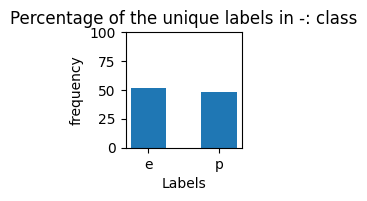

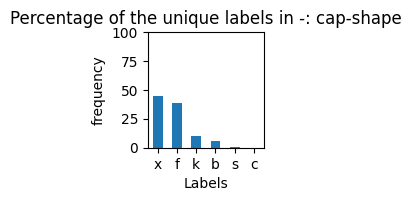

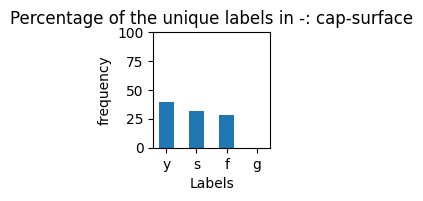

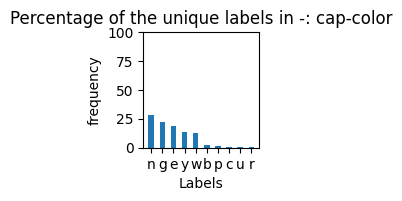

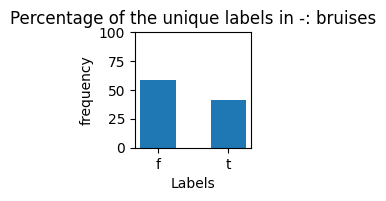

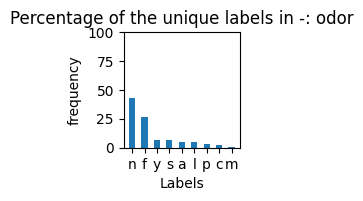

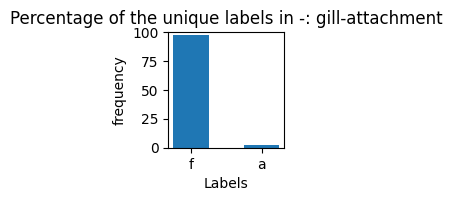

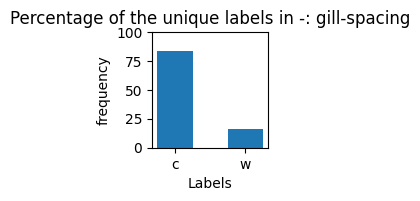

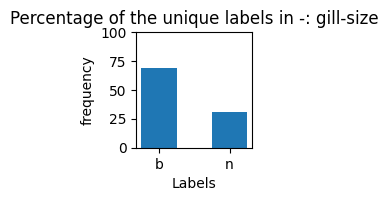

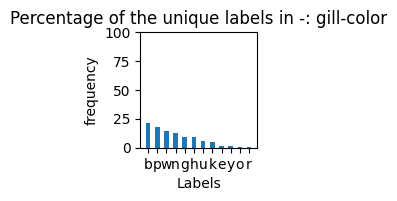

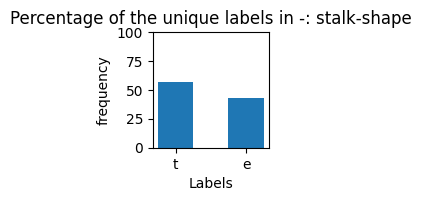

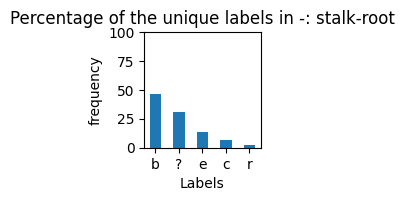

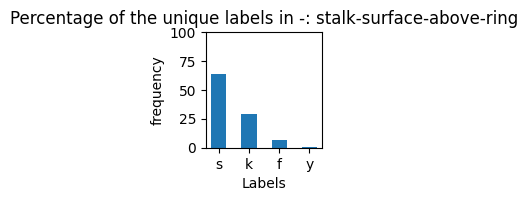

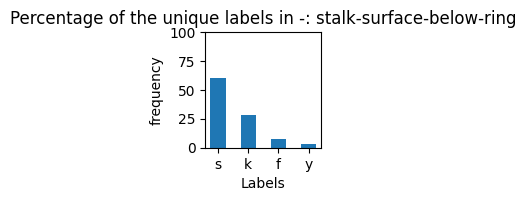

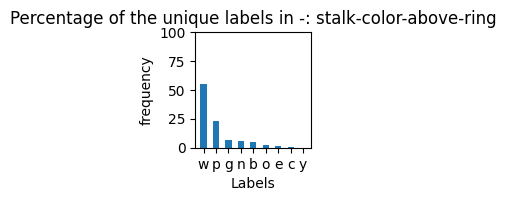

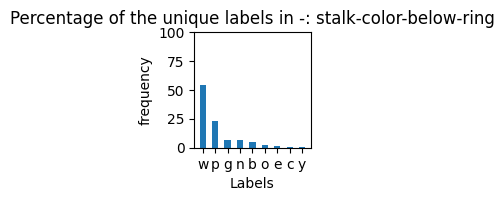

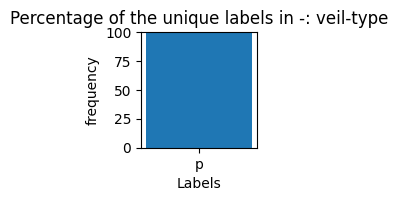

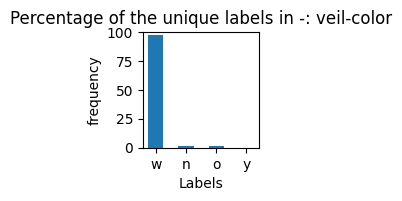

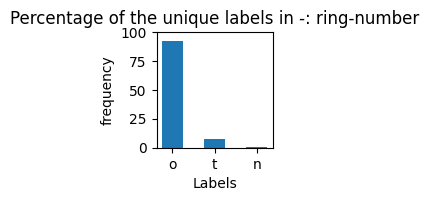

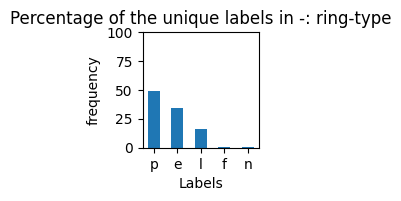

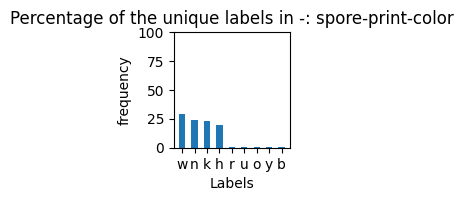

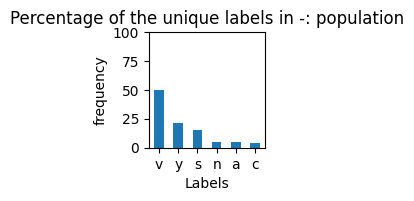

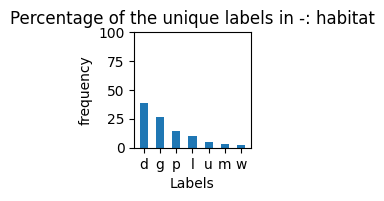

In [177]:
for i in columns:
    dic = dict(df[i].value_counts())
    features = list(dic.keys())
    frequency = list(dic.values())
    frequency = (np.array(frequency)/df.shape[0])*100
    py.figure(figsize= (1.5,1.5))
    py.bar(features,frequency,width = 0.5)
    py.title(f"Percentage of the unique labels in -: {i}")
    py.ylim(0,100)
    py.xlabel("Labels")
    py.ylabel("frequency")
    py.show()
    


In [178]:
# From the above data explotoary analysis, we find that we need to get rid of veil-type.

# Do we have to specify in the mushroom classification dataset that it only predicts on veil type?? cause that could be a feature for predicitng posnous or non pisonous 
# but at the same time , we have other features whcihc an help us predict on that.

In [179]:
df_old_copy = df.copy(deep=True)
df.drop(axis=1,labels = ['veil-type'],inplace=True)

#print(df_old_copy.to_string())
#print(df.to_string())

print(df_old_copy.shape)
print(df.shape)

#print(df_old_copy.columns())
# print(df.columns())


(8124, 23)
(8124, 22)


In [180]:
def plotPattern(feature1,feature2):
  frequency_df = df.groupby([feature1, feature2]).size().reset_index(name='count')
  py.figure(figsize=(2, 2))
  sns.barplot(x=feature1, y='count', hue=feature2, data=frequency_df)
  py.title(f"Frequency of Values in {feature2} wrt {feature1}")
  py.xlabel(feature1)
  py.ylabel('Count')
  py.legend(title=feature2)
  py.show()

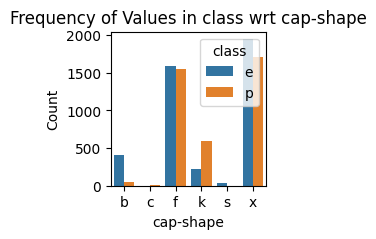

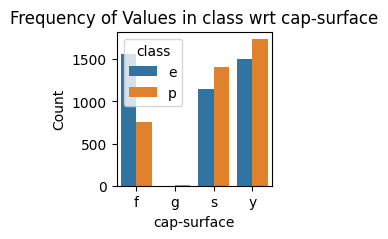

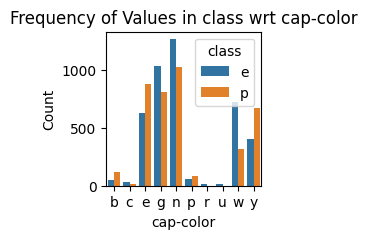

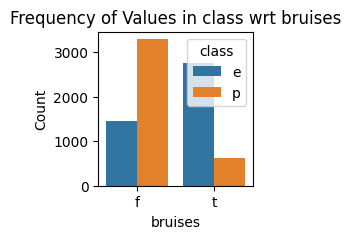

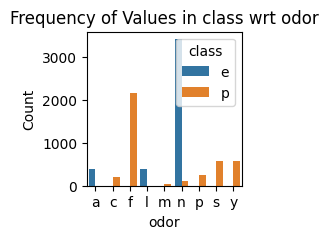

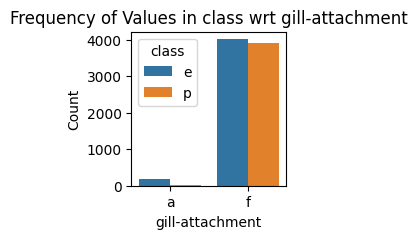

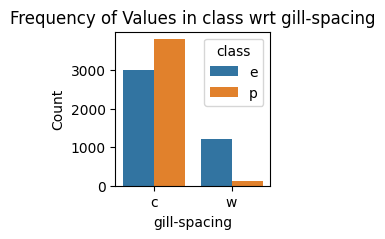

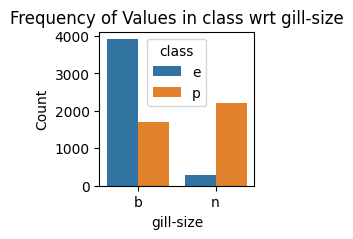

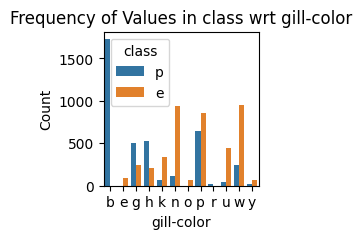

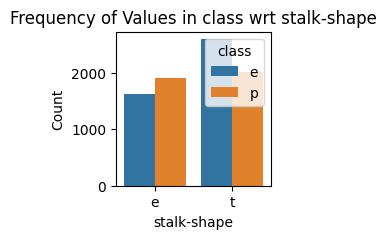

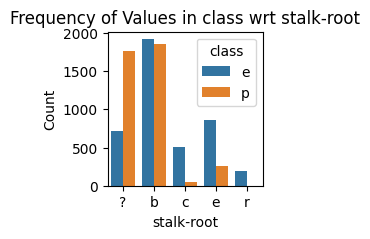

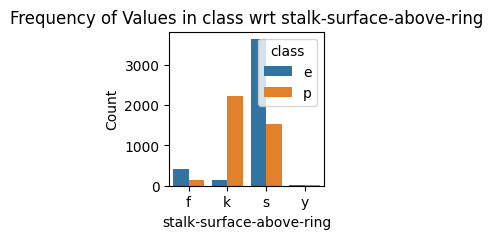

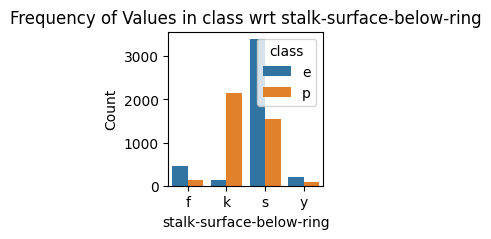

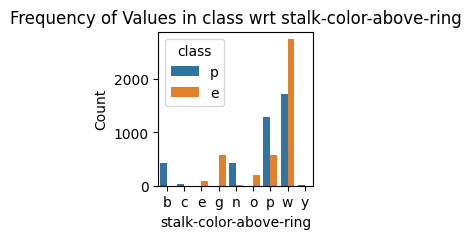

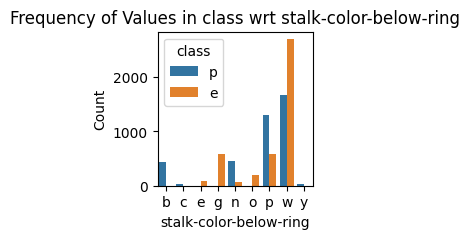

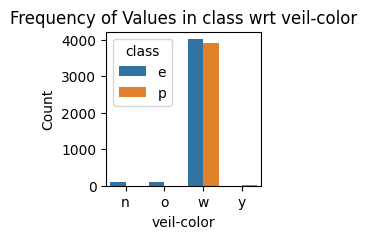

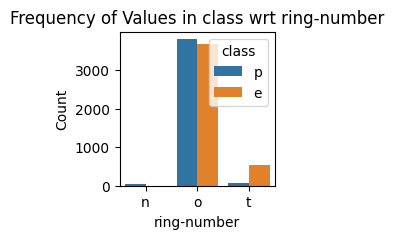

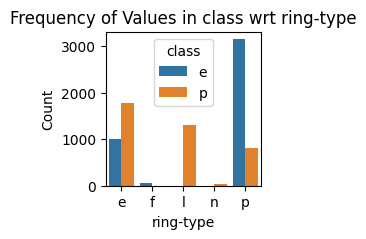

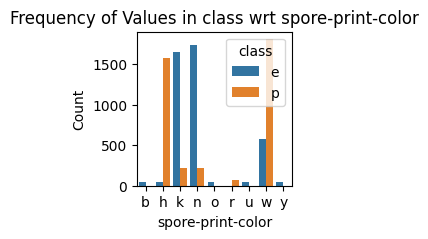

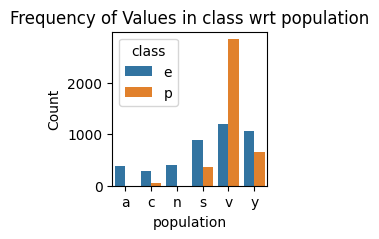

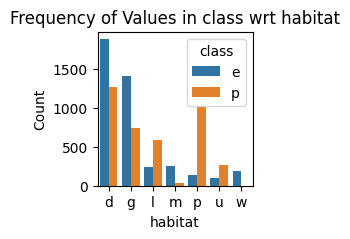

In [181]:
columns = df.columns
for i in columns[1:]:
    plotPattern(i,"class")


In [182]:
# since it doesnt make senese to use labeel enoder before smote, we will have to do one hot encoding,
# apply smote and then group the unique values in the features into one feature....well have to do this extra step unfortunatley

# Decision: Lets apply this fucntionality later....lets just work with the original dataset for now and aplly label encoder 

In [183]:
labelEncoders = []
for i in columns:
    lE = LabelEncoder()
    df[i] =lE.fit_transform(df[i])
    labelEncoders.append(lE)
    
df  

# for i in columns:
#     print(df[i].value_counts())  

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,2,5,5,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,2,5,5,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,2,5,5,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,2,1,7,7,2,1,0,7,4,2


In [184]:
# Removing hihgly coorelated columns
df_copy = df.drop(columns=['class'])

corr_matrix = df_copy.corr()  # coorelation matrix
print(corr_matrix.to_string())
iters = range(len(corr_matrix.columns) - 1)
drop_cols = []

    # Iterate through the correlation matrix and compare correlations
for i in iters:
    for j in range(i+1):
        item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
        col = item.columns
        row = item.index
        val = abs(item.values)

            # If correlation exceeds the threshold
        if val >= 0.8:
            # Print the correlated features and the correlation value
            print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
            drop_cols.append(col.values[0])

    # Drop one of each pair of correlated columns
drops = set(drop_cols)
df = df.drop(labels = drops, axis =1)
print(df.shape)

                          cap-shape  cap-surface  cap-color   bruises      odor  gill-attachment  gill-spacing  gill-size  gill-color  stalk-shape  stalk-root  stalk-surface-above-ring  stalk-surface-below-ring  stalk-color-above-ring  stalk-color-below-ring  veil-color  ring-number  ring-type  spore-print-color  population   habitat
cap-shape                  1.000000    -0.050454  -0.048203 -0.035374 -0.021935         0.078865      0.013196   0.054050   -0.006039     0.063794    0.030191                 -0.030417                 -0.032591               -0.031659               -0.030390    0.072560    -0.106534  -0.025457          -0.073416    0.063413 -0.042221
cap-surface               -0.050454     1.000000  -0.019402  0.070228  0.045233        -0.034180     -0.282306   0.208100   -0.161017    -0.014123   -0.126245                  0.089090                  0.107965                0.066050                0.068885   -0.016603    -0.026147  -0.106407           0.230364    0.021555  0

In [185]:
# Plotting the distribution of output in the split data

def outputDistribution(noofSets, arrayOfSets,nameOfSets):

  for i in range(noofSets):     
      
    dic_set = defaultdict(int)
    
    for j in arrayOfSets[i]:
        dic_set[j] += 1

    keys = []
    values = []
    
    sorted_Items = sorted(dic_set.items())
    for k in sorted_Items:
      keys.append(str(k[0]))
      values.append(k[1])

    values_percentage = (np.array(values)/sum(dic_set.values()))*100
     
    py.figure(figsize=(1.2,1.2))
    py.title(f"Distribution of outputs in {nameOfSets[i]} set")
    py.bar(keys,values_percentage,width=0.5)
    py.ylim(0,100)
    py.xlabel("Outputs")
    py.ylabel("Percentage %")
    py.show()

In [186]:
def split(x,y):
    x_train,x_,y_train,y_ = train_test_split(x,y,train_size=0.6,random_state=42)
    x_cv,x_test,y_cv,y_test = train_test_split(x_,y_,train_size=0.5,random_state=42)
    return x_train,y_train,x_cv,y_cv,x_test,y_test

In [187]:
# evaluates how well the model predicts given the features , correct output , and model...return the percentage it does not predict correclty
def accuracy(model,x,y):
    pred = model.predict(x)
    return np.mean(y.flatten() == pred)*100 , pred 

In [188]:
# plots or prints information about the feature importance of a model
def info(model,plot,featureNames):
    impFeatures = model.feature_importances_
    impFeaturesIntoPercentage = impFeatures*100
    
    #print(impFeaturesIntoPercentage)
    
    if(plot):
        fig, ax = py.subplots()
        fig.set_figheight(8)
        fig.set_figwidth(35)
        ax.set_xlabel("Features")
        ax.set_ylabel("Importance %")
        ax.set_title("Features importance")
        ax.set_ylim(0,100)
        bar_container = ax.bar(featureNames,impFeaturesIntoPercentage)
        ax.bar_label(bar_container, fmt='{:,.2f}')
        
        
    else:    
       print(impFeaturesIntoPercentage)

In [208]:
def accuracyDistribution(preds,actual,subset):
    
    noOfVals = defaultdict(int)
    for i in actual:
        noOfVals[i]+=1
    
    correctVal = defaultdict(int)
    
    for i in range(len(actual)):
        if(actual[i]==preds[i]):
            correctVal[actual[i]]+=1
    
    percentage = {}
    for i in noOfVals:
        if i in correctVal:
            percentage[i] = (correctVal[i]/noOfVals[i])*100
        else:
            percentage[i] = 0
            
            
    values = percentage.keys()
    percentages = percentage.values()
    
    fig, ax = py.subplots()
    fig.set_figheight(3)
    fig.set_figwidth(3)
    ax.set_xlabel("Quality Values")
    ax.set_ylabel("Accuracy%")
    ax.set_title(f"Accuracy percentage in {subset} set")
    ax.set_ylim(0,150)
    bar_container = ax.bar(values ,percentages)
    ax.bar_label(bar_container, fmt='{:,.2f}')

# Base model (Feture Selection 1 )

In [190]:
x_df = df.iloc[:,1:]
y_df = df.iloc[:,0]

x = x_df.to_numpy()
y = y_df.to_numpy()

x_train,y_train,x_cv,y_cv,x_test,y_test = split(x,y)

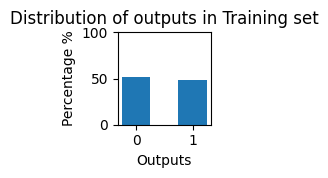

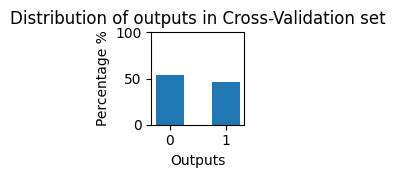

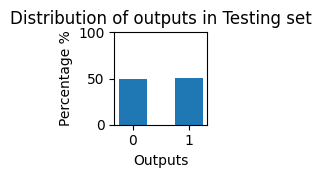

In [191]:
outputDistribution(3,[y_train,y_cv,y_test],["Training","Cross-Validation","Testing"])

In [192]:
featureNames1 = x_df.columns

In [ ]:
paramGrid = {'max_depth': [6,10,15,20],'n_estimators': [100,150,200,250],'learning_rate': [0.01,0.1,0.3],'reg_lambda':[0.1,1,10],'early_stopping_rounds': [10,20,25] , 'subsample': [0.6,0.8,1.0], 'gamma': [0.1,0.2]}
model = XGBClassifier(booster = 'gbtree', verbosity=1,objective='binary:logistic',n_jobs=-1)
grid = GridSearchCV(estimator=model, verbose=1, n_jobs=-1,refit=True,param_grid=paramGrid,return_train_score=True,cv=3)
gridTrained = grid.fit( X= x_train, y= y_train,eval_set = [(x_cv, y_cv)]) 

# silent = True is verbosity = 0
# cv set is needed for determine if to early stop or not

In [194]:
results = pd.DataFrame(gridTrained.cv_results_)
resultsMod = pd.DataFrame({})

resultsMod['params'] = results['params']
resultsMod['mean_train_score'] = results['mean_train_score']
resultsMod['mean_test_score'] = results['mean_test_score']

train_accuracies = resultsMod['mean_train_score'].to_numpy()
test_accuracies = resultsMod['mean_test_score'].to_numpy()
paramsArr = resultsMod['params'].to_list()

train_accuracies_percent = (resultsMod['mean_train_score'].to_numpy())*100
test_accuracies_percent = (resultsMod['mean_test_score'].to_numpy())*100

In [ ]:
print("Description of the model chosen by grid_cv-: \n")


# General Descripton of the model
bestModel1 = gridTrained.best_estimator_
indexOfBestModel1 = gridTrained.best_index_
params1 = gridTrained.best_params_
score1 = gridTrained.best_score_

print(f"Index of model: {indexOfBestModel1}\n")
print(f"Parameters: {params1}\n")


# Accuracy percentage during and after training (%)
print("While performing stratified K fold-: ")
print(f"Mean Training accuracy: {score1*100}")
print(f"Mean Testing accuracy: {test_accuracies_percent[indexOfBestModel1]}\n")

train_accuracy1 , train_pred1 = accuracy(bestModel1,x_train,y_train)
cv_accuracy1 , cv_pred1 = accuracy(bestModel1,x_cv,y_cv)
test_accuracy1 , test_pred1 = accuracy(bestModel1,x_test,y_test)

print("After Training-: ")
print(f"Training accuracy: {train_accuracy1}")
print(f"Cross-Validation accuracy: {cv_accuracy1}")
print(f"Testing accuracy: {test_accuracy1}\n")


# Accuracy distribution description 
accuracyDistribution(train_pred1,y_train,"Training: ")
accuracyDistribution(cv_pred1,y_cv,"Cross-Validation: ")
accuracyDistribution(test_pred1,y_test,"Testing: ")

# Classification reports
print("Training: \n")
print(classification_report(y_true = y_train,y_pred=train_pred1))
print("Cross-Validation: \n")
print(classification_report(y_true = y_cv,y_pred=cv_pred1))
print("Testing: \n")
print(classification_report(y_true = y_test,y_pred=test_pred1))

# Feature Distribution
info(bestModel1,True,featureNames1)
info(bestModel1,False,featureNames1)


# I think we can combine the cv and testing set since the model is not trained on any datapoint of the cv set 

#Doubt
# does it show error if y pred has more classes than y train (get into deatil into this)
# positional argument follows keyword argument. research more about this


# Feature Selection 1 

In [ ]:
# Lets do feature selection, will reduce the complexity of the model, as the user may not have all the inputs...
# lets remove cap-shape , gill-attachment, gill-spacing, stalk-surface-above-ring, stalk-surface-below-ring, ring-type, ring-number, 

In [196]:
# After Feature selection

df_mod2 = df.drop(columns=['cap-shape','gill-attachment','gill-spacing','stalk-surface-above-ring','stalk-surface-below-ring','ring-number', 'ring-type'], inplace=False)

x_df2 = df_mod2.iloc[:,1:]
y_df2 = df_mod2.iloc[:,0]   

x_2 = x_df2.to_numpy()
y_2 = y_df2.to_numpy()

x_train_2,y_train_2,x_cv_2,y_cv_2,x_test_2,y_test_2 = split(x_2,y_2)
 
# print(type(x_new_df))
# print(type(y_new_df))
# print(x_new_df.columns)
# print(y_new_df.columns)



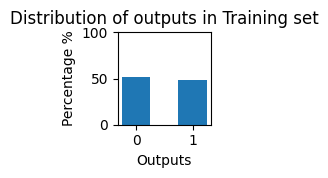

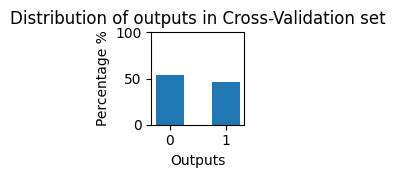

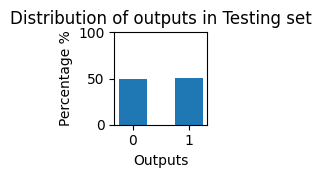

In [197]:
outputDistribution(3,[y_train_2,y_cv_2,y_test_2],["Training","Cross-Validation","Testing"])

In [198]:
featureNames2 = x_df2.columns

In [ ]:
paramGrid = {'max_depth': [6,10,15,20],'n_estimators': [100,150,200,250],'learning_rate': [0.01,0.1,0.3],'reg_lambda':[0.1,1,10],'early_stopping_rounds': [10,20,25] , 'subsample': [0.6,0.8,1.0], 'gamma': [0.1,0.2]}
model = XGBClassifier(booster = 'gbtree', verbosity=1,objective='binary:logistic',n_jobs=-1)
grid = GridSearchCV(estimator=model, verbose=1, n_jobs=-1,refit=True,param_grid=paramGrid,return_train_score=True,cv=3)
gridTrained = grid.fit( X= x_train_2, y= y_train_2,eval_set = [(x_cv_2, y_cv_2)]) 

In [200]:
results2 = pd.DataFrame(gridTrained.cv_results_)
resultsMod2 = pd.DataFrame({})

resultsMod2['params'] = results2['params']
resultsMod2['mean_train_score'] = results2['mean_train_score']
resultsMod2['mean_test_score'] = results2['mean_test_score']

train_accuracies2 = resultsMod2['mean_train_score'].to_numpy()
test_accuracies2 = resultsMod2['mean_test_score'].to_numpy()
paramsArr_new = resultsMod2['params'].to_list()

train_accuracies_percent2 = (train_accuracies2 )*100
test_accuracies_percent2 = (test_accuracies2)*100

Description of the model chosen by grid_cv- after feature selection: 

Index of model: 144

Parameters: {'early_stopping_rounds': 10, 'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 100, 'reg_lambda': 0.1, 'subsample': 0.6}

While performing stratified K fold-: 
Mean Training accuracy: 100.0
Mean Testing accuracy: 100.0

After Training-: 
Training accuracy: 100.0
Cross-Validation accuracy: 100.0
Testing accuracy: 100.0

Training: 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2530
           1       1.00      1.00      1.00      2344

    accuracy                           1.00      4874
   macro avg       1.00      1.00      1.00      4874
weighted avg       1.00      1.00      1.00      4874

Cross-Validation: 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       874
           1       1.00      1.00      1.00       751

    accuracy                     

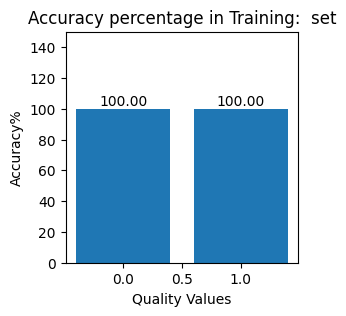

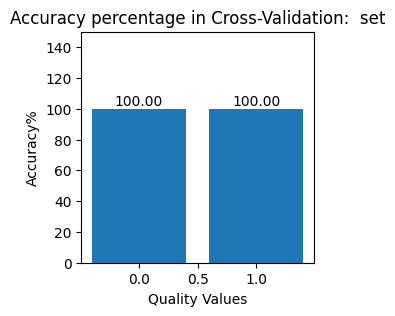

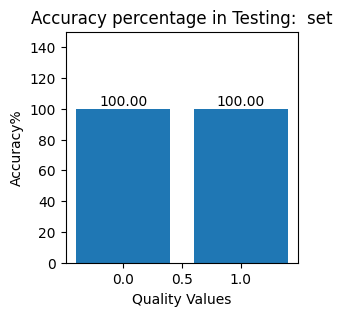

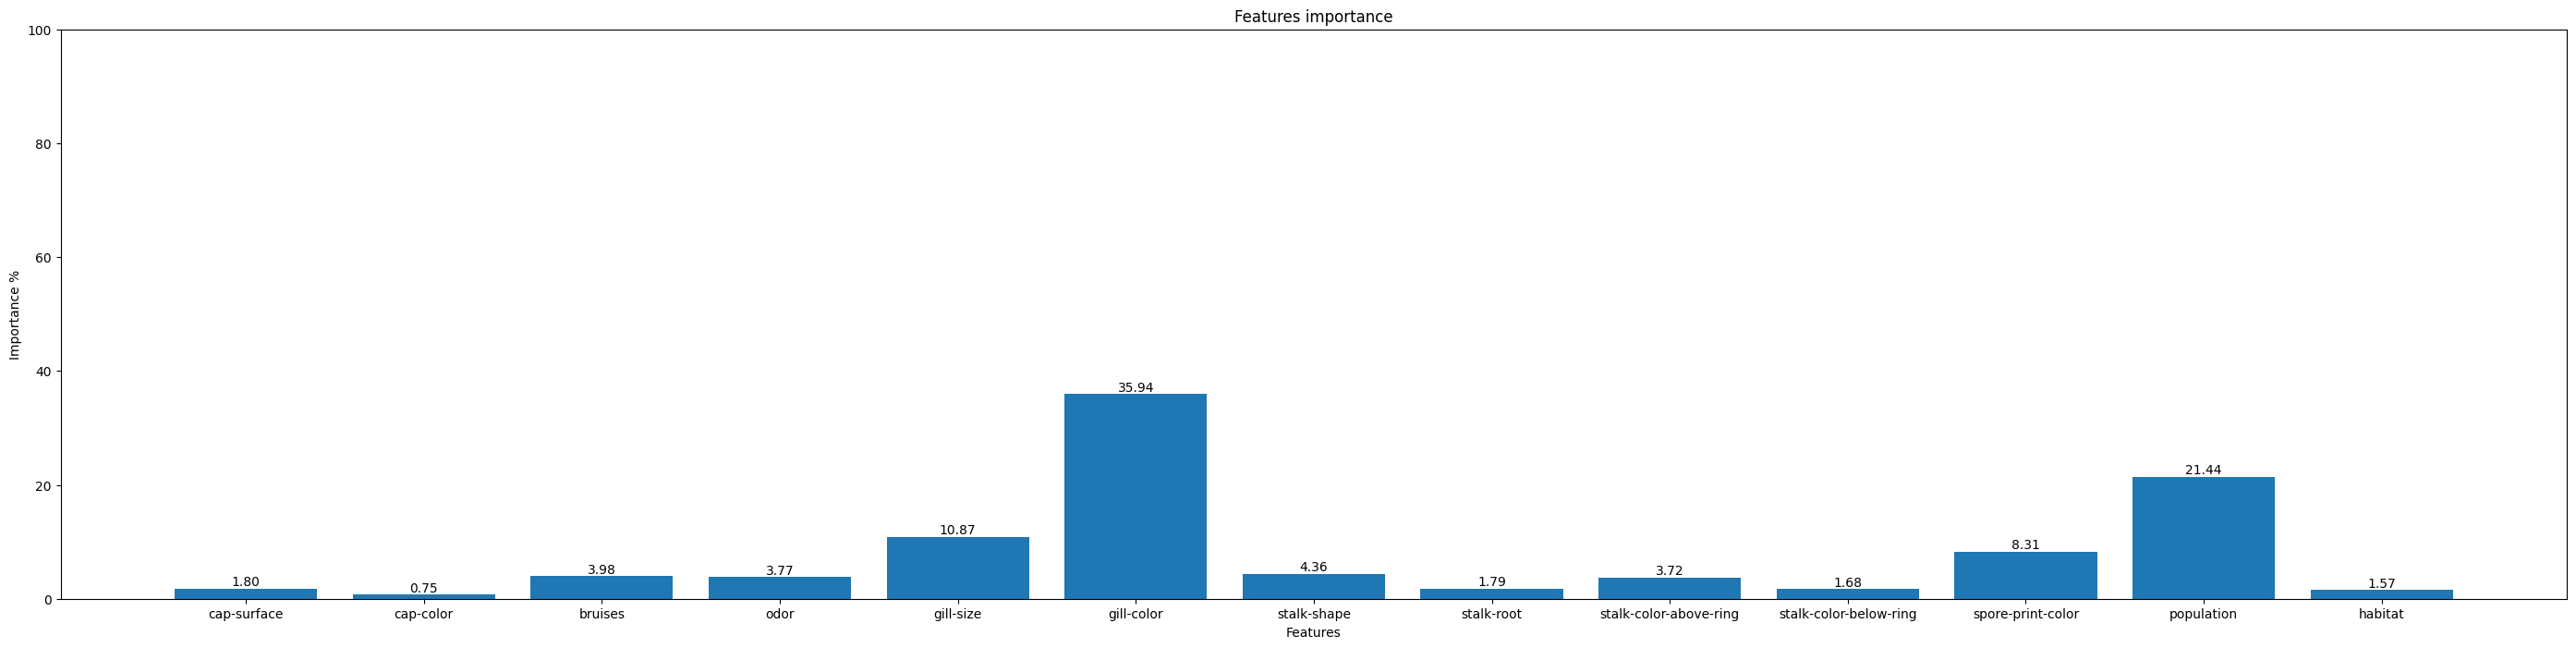

In [209]:
print("Description of the model chosen by grid_cv- after feature selection: \n")


# General Descripton of the model
bestModel2 = gridTrained.best_estimator_
indexOfBestModel2 = gridTrained.best_index_
params2 = gridTrained.best_params_
score2 = gridTrained.best_score_

print(f"Index of model: {indexOfBestModel2}\n")
print(f"Parameters: {params2}\n")


# Accuracy percentage during and after training (%)
print("While performing stratified K fold-: ")
print(f"Mean Training accuracy: {score2*100}")
print(f"Mean Testing accuracy: {test_accuracies_percent2[indexOfBestModel2]}\n")

train_accuracy2 , train_pred2 = accuracy(bestModel2,x_train_2,y_train_2)
cv_accuracy2 , cv_pred2 = accuracy(bestModel2,x_cv_2,y_cv_2)
test_accuracy2 , test_pred2 = accuracy(bestModel2,x_test_2,y_test_2)

print("After Training-: ")
print(f"Training accuracy: {train_accuracy2}")
print(f"Cross-Validation accuracy: {cv_accuracy2}")
print(f"Testing accuracy: {test_accuracy2}\n")


# Accuracy distribution description 
accuracyDistribution(train_pred2,y_train_2,"Training: ")
accuracyDistribution(cv_pred2,y_cv_2,"Cross-Validation: ")
accuracyDistribution(test_pred2,y_test_2,"Testing: ")

# Classification reports
print("Training: \n")
print(classification_report(y_true = y_train_2,y_pred=train_pred2))
print("Cross-Validation: \n")
print(classification_report(y_true = y_cv_2,y_pred=cv_pred2))
print("Testing: \n")
print(classification_report(y_true = y_test_2,y_pred=test_pred2))

# Feature Distribution
info(bestModel2,True,featureNames2)
info(bestModel2,False,featureNames2)

# Feature Selection 2

In [ ]:
# Lets do feature selection, will reduce the complexity of the model, as the user may not have all the inputs...
# lets remove cap-surface, cap-color, stalk-root, stalk-color-below-ring, 

In [220]:
df_mod3 = df_mod2.drop(columns=['cap-color','cap-surface','stalk-color-above-ring','stalk-color-below-ring','habitat','stalk-root'], inplace=False)

x_df3 = df_mod3.iloc[:,1:]
y_df3 = df_mod3.iloc[:,0]   

x_3 = x_df3.to_numpy()
y_3 = y_df3.to_numpy()

x_train_3,y_train_3,x_cv_3,y_cv_3,x_test_3,y_test_3 = split(x_3,y_3)

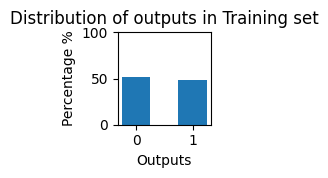

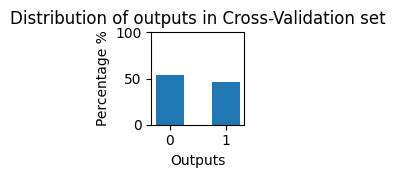

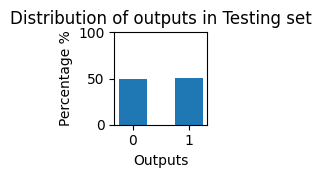

In [221]:
outputDistribution(3,[y_train_3,y_cv_3,y_test_3],["Training","Cross-Validation","Testing"])

In [222]:
featureNames3 = x_df3.columns
print(featureNames3)

Index(['bruises', 'odor', 'gill-size', 'gill-color', 'stalk-shape',
       'spore-print-color', 'population'],
      dtype='object')


In [ ]:
paramGrid = {'max_depth': [6,10,15,20],'n_estimators': [100,150,200,250],'learning_rate': [0.01,0.1,0.3],'reg_lambda':[0.1,1,10],'early_stopping_rounds': [10,20,25] , 'subsample': [0.6,0.8,1.0], 'gamma': [0.1,0.2]}
model = XGBClassifier(booster = 'gbtree', verbosity=1,objective='binary:logistic',n_jobs=-1)
grid = GridSearchCV(estimator=model, verbose=1, n_jobs=-1,refit=True,param_grid=paramGrid,return_train_score=True,cv=3)
gridTrained = grid.fit( X= x_train_3, y= y_train_3,eval_set = [(x_cv_3, y_cv_3)]) 

In [224]:
results3 = pd.DataFrame(gridTrained.cv_results_)
resultsMod3 = pd.DataFrame({})

resultsMod3['params'] = results2['params']
resultsMod3['mean_train_score'] = results2['mean_train_score']
resultsMod3['mean_test_score'] = results2['mean_test_score']

train_accuracies3 = resultsMod3['mean_train_score'].to_numpy()
test_accuracies3 = resultsMod3['mean_test_score'].to_numpy()
paramsArr_new = resultsMod3['params'].to_list()

train_accuracies_percent3 = (train_accuracies3 )*100
test_accuracies_percent3 = (test_accuracies3)*100

Description of the model chosen by grid_cv- after feature selection: 

Index of model: 29

Parameters: {'early_stopping_rounds': 10, 'gamma': 0.1, 'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 250, 'reg_lambda': 0.1, 'subsample': 1.0}

While performing stratified K fold-: 
Mean Training accuracy: 99.6717190855122
Mean Testing accuracy: 99.73328280914488

After Training-: 
Training accuracy: 99.6717275338531
Cross-Validation accuracy: 99.63076923076923
Testing accuracy: 99.38461538461539

Training: 

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2530
           1       1.00      0.99      1.00      2344

    accuracy                           1.00      4874
   macro avg       1.00      1.00      1.00      4874
weighted avg       1.00      1.00      1.00      4874

Cross-Validation: 

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       874
           1       1.00      0

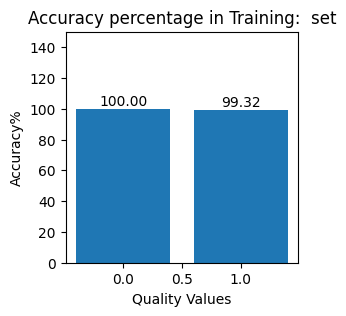

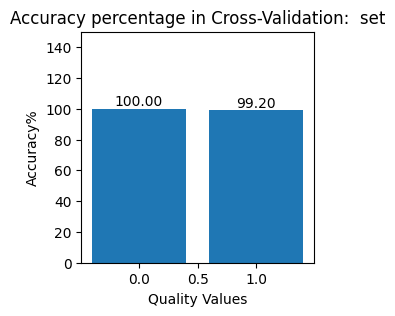

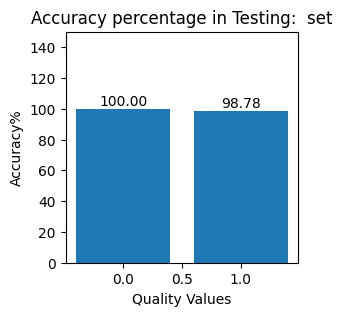

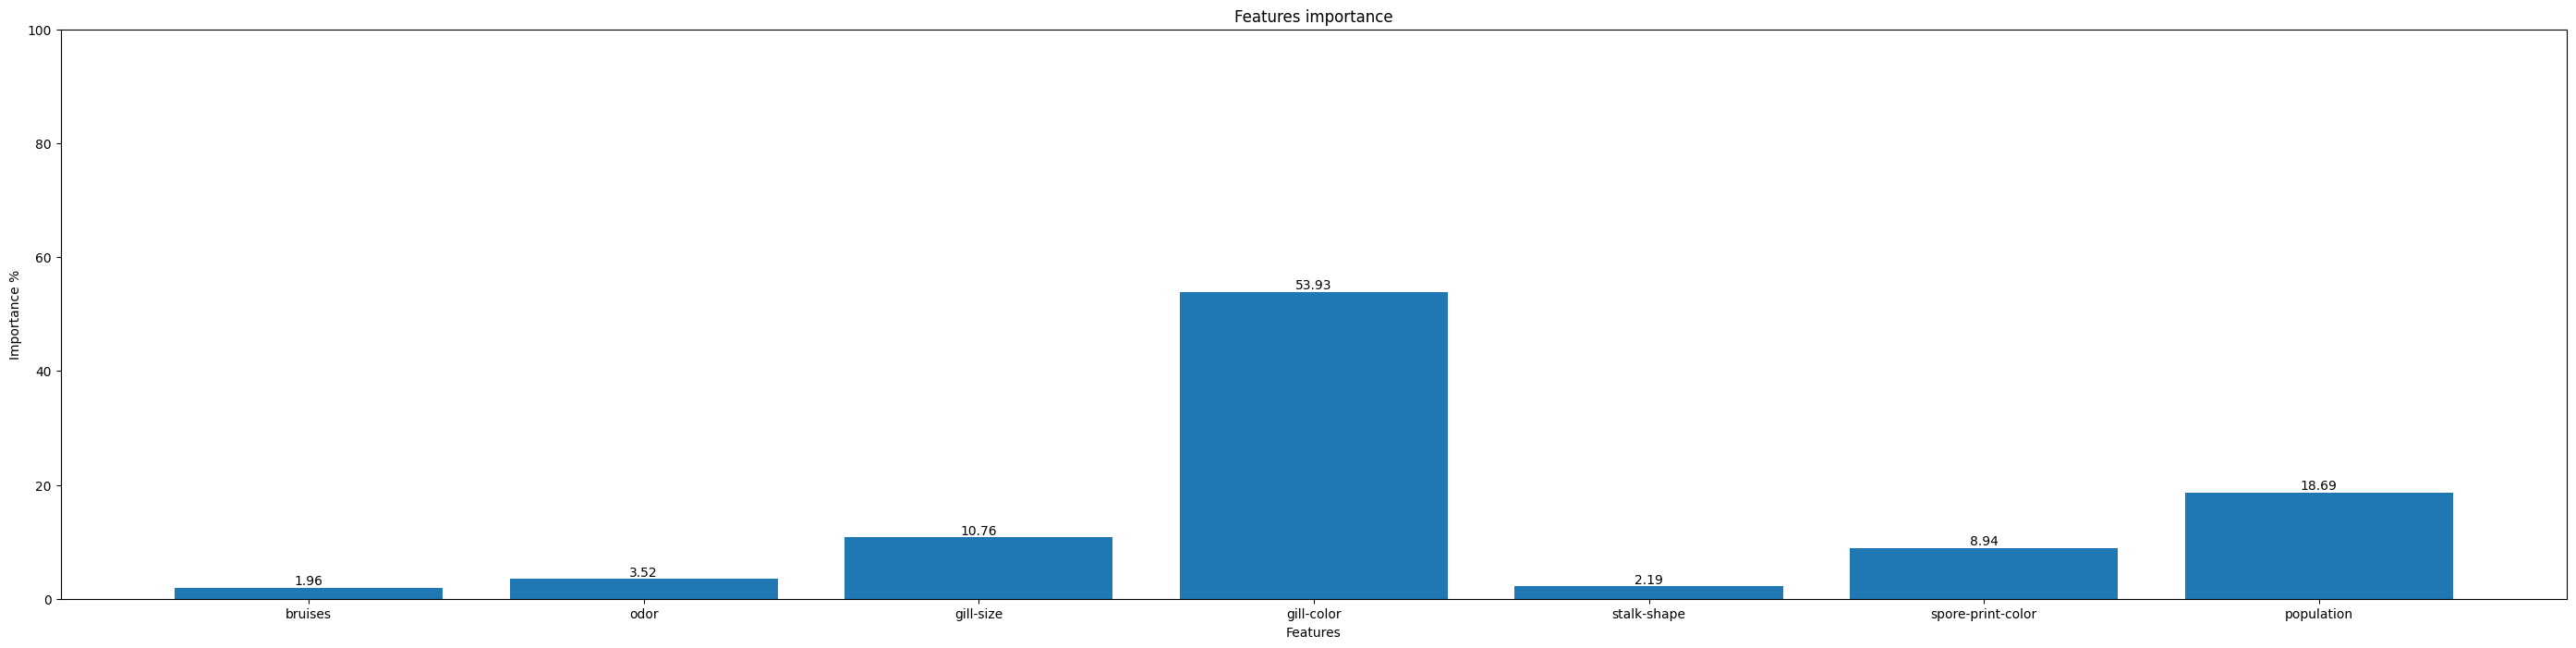

In [225]:
print("Description of the model chosen by grid_cv- after feature selection: \n")


# General Descripton of the model
bestModel3 = gridTrained.best_estimator_
indexOfBestModel3 = gridTrained.best_index_
params3 = gridTrained.best_params_
score3 = gridTrained.best_score_

print(f"Index of model: {indexOfBestModel3}\n")
print(f"Parameters: {params3}\n")


# Accuracy percentage during and after training (%)
print("While performing stratified K fold-: ")
print(f"Mean Training accuracy: {score3*100}")
print(f"Mean Testing accuracy: {test_accuracies_percent3[indexOfBestModel3]}\n")

train_accuracy3 , train_pred3 = accuracy(bestModel3,x_train_3,y_train_3)
cv_accuracy3 , cv_pred3 = accuracy(bestModel3,x_cv_3,y_cv_3)
test_accuracy3 , test_pred3 = accuracy(bestModel3,x_test_3,y_test_3)

print("After Training-: ")
print(f"Training accuracy: {train_accuracy3}")
print(f"Cross-Validation accuracy: {cv_accuracy3}")
print(f"Testing accuracy: {test_accuracy3}\n")


# Accuracy distribution description 
accuracyDistribution(train_pred3,y_train_3,"Training: ")
accuracyDistribution(cv_pred3,y_cv_3,"Cross-Validation: ")
accuracyDistribution(test_pred3,y_test_3,"Testing: ")

# Classification reports
print("Training: \n")
print(classification_report(y_true = y_train_3,y_pred=train_pred3))
print("Cross-Validation: \n")
print(classification_report(y_true = y_cv_3,y_pred=cv_pred3))
print("Testing: \n")
print(classification_report(y_true = y_test_3,y_pred=test_pred3))

# Feature Distribution
info(bestModel3,True,featureNames3)
info(bestModel3,False,featureNames3)

In [202]:
# Next set of implementations

# compare all the models that have same accuracy (100%)
# combine prolly the cv and testing...makes up for better validation when implementing early_stop_rounds
# do feature selection and select the fearues which actually have significant importance
# modify accuracy distribution to be as desired